# Data train

## Load Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

train_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Titanic_data/train.csv")
train_df.set_index("PassengerId",inplace=True)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df=train_df.drop("Name",axis=1)
train_df=train_df.drop("Cabin",axis=1)

In [4]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 69.6+ KB


In [6]:
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

## Data Analysis


In [7]:
train_df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,2


## Preprocessing

In [8]:
train_df.dropna(subset=["Embarked"],inplace=True)

In [9]:
label_col=["Sex","Embarked","Ticket"]

In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in label_col :
  train_df[col] = label_encoder.fit_transform(train_df[col])


In [11]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,1,22.0,1,0,522,7.2500,2
2,1,1,0,38.0,1,0,595,71.2833,0
3,1,3,0,26.0,0,0,668,7.9250,2
4,1,1,0,35.0,1,0,48,53.1000,2
5,0,3,1,35.0,0,0,471,8.0500,2
...,...,...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,100,13.0000,2
888,1,1,0,19.0,0,0,14,30.0000,2
889,0,3,0,NaN,1,2,674,23.4500,2


### fill NA

In [12]:
from sklearn.impute import SimpleImputer

missing_values_cols=["Age","Embarked"]
# Sử dụng SimpleImputer để điền giá trị thiếu
for col in missing_values_cols:
  imputer = SimpleImputer(strategy='mean')
  train_df[col] = imputer.fit_transform(train_df[[col]])
train_df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


## Feature Engineering

In [13]:
categorical_columns=[]
for col in train_df.columns:
  if len(train_df[col].unique())<=4:
    categorical_columns.append(col)
categorical_columns

['Survived', 'Pclass', 'Sex', 'Embarked']

In [14]:
numerical_columns=[]
for col in train_df.columns:
  if col not in categorical_columns:
    numerical_columns.append(col)
numerical_columns

['Age', 'SibSp', 'Parch', 'Ticket', 'Fare']

### draw histogram for numerical columns

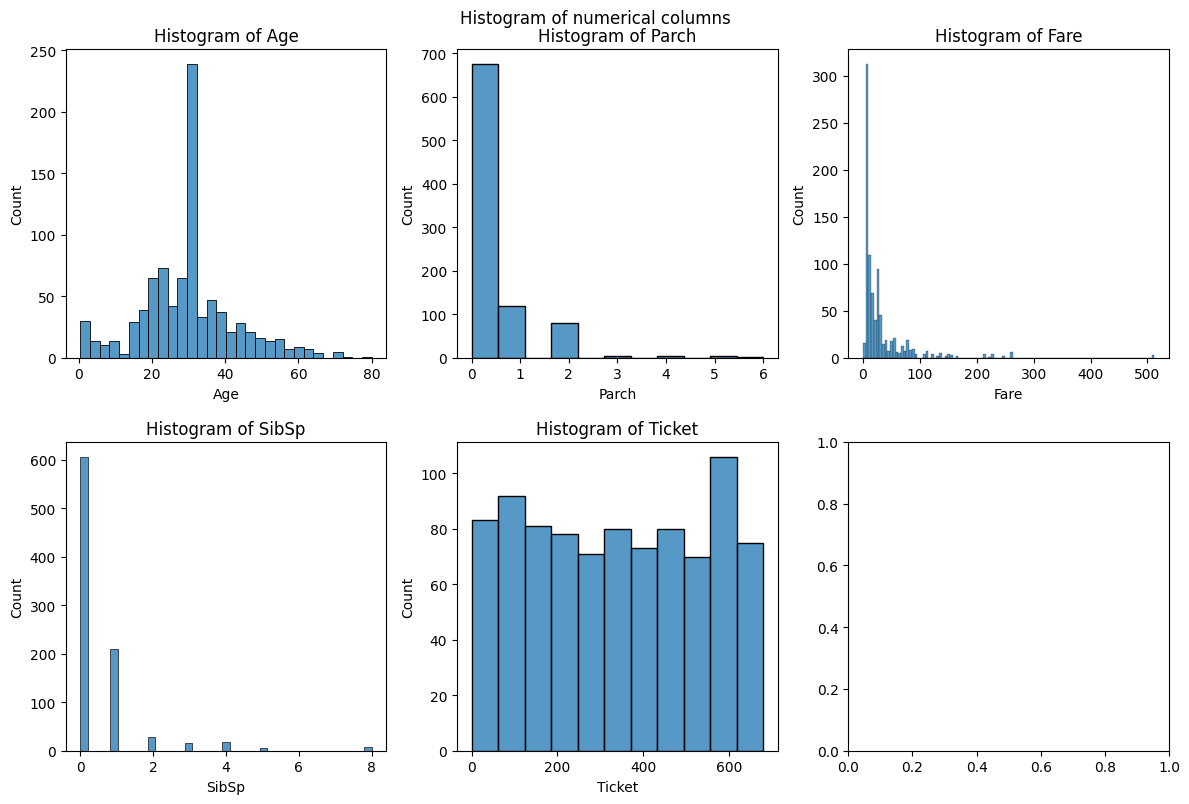

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
def hist_numerical_col(numerical_columns,df):
  col=3
  row=2

  fig,axes=plt.subplots(row,col,figsize=(12,row*4))
  fig.suptitle("Histogram of numerical columns", y=1.0)

  for i,column in enumerate(numerical_columns):
    col=i//2
    row=i%2
    sns.histplot(data=df,x=column,ax=axes[row,col])
    axes[row,col].set_title(f"Histogram of {column}")

  plt.tight_layout()
  plt.subplots_adjust(top=0.95)
  plt.show()

hist_numerical_col(numerical_columns,train_df)


### histogram for categorical columns

<Axes: xlabel='Survived', ylabel='count'>

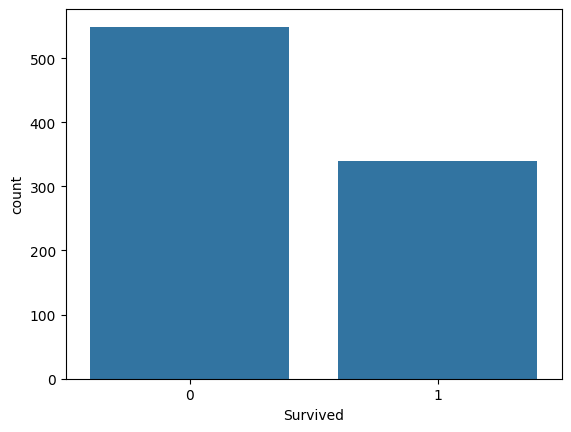

In [16]:
# draw countplot for categorical columns
sns.countplot(x="Survived",data=train_df)

In [17]:
def normalized_data(df):
    normalized_data=df.copy()
    for column in categorical_columns:
      normalized_data[column]=normalized_data[column].astype("category").cat.codes
      return normalized_data

<Axes: >

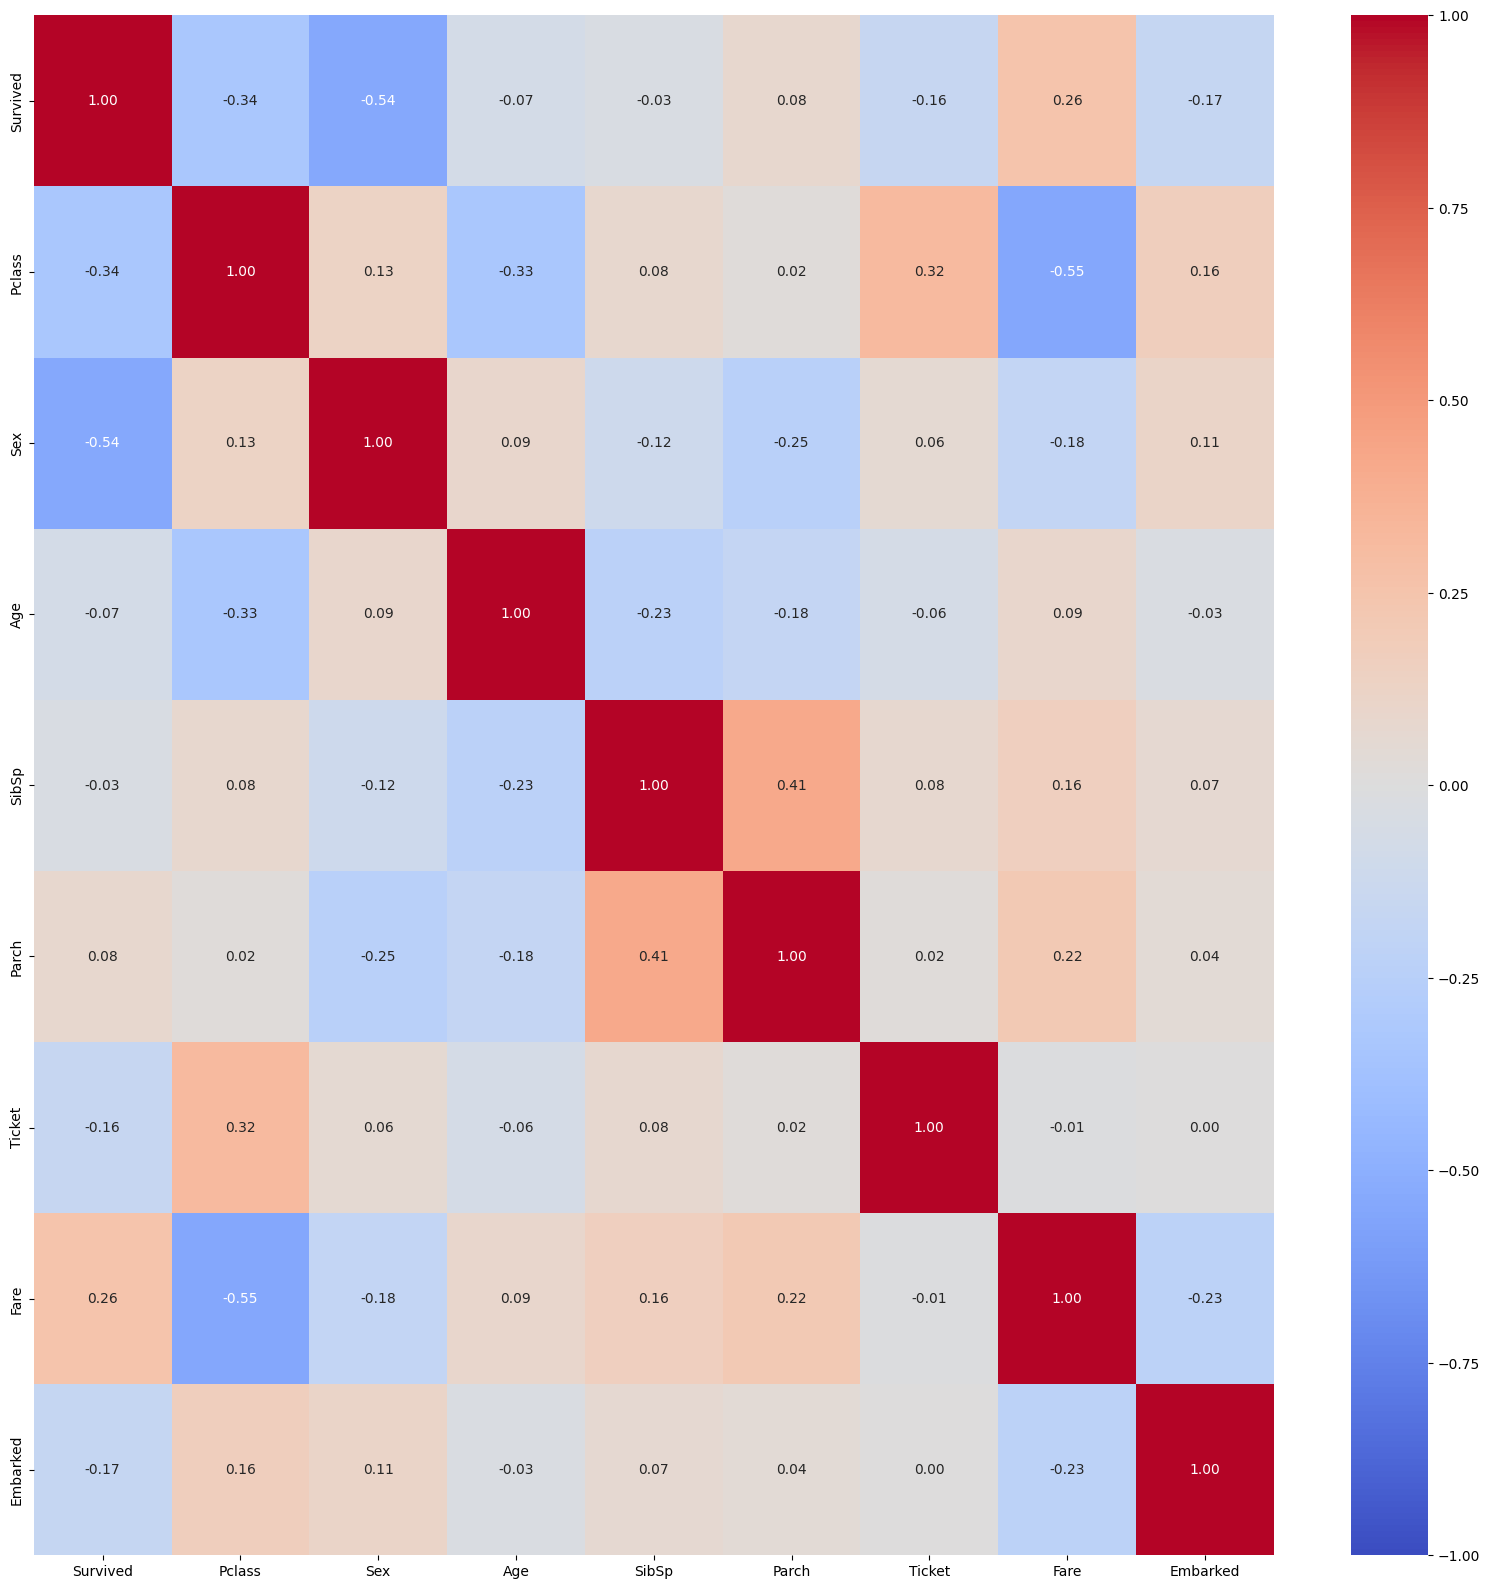

In [18]:
# Heatmap
import seaborn as sns

def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: Normalize your data
    df=normalized_data(df.copy())
    return df

train_df = apply_feature_engineering(train_df)
plt.figure(figsize=(20, 20))
sns.heatmap(train_df.corr(),vmin=-1.0,vmax=1.0,cmap="coolwarm",annot=True,fmt=".2f") # Show heatmap after normalized data

### Prepare Data

In [19]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    columns=df.columns.tolist()
    columns.remove("Survived")
    X = df[columns]# Todo: Select features
    y = df["Survived"]# Todo: Select label
    return X, y

X, y = prepare_X_y(train_df)

## Apply machine learning model

### Train-Test split

In [20]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 2112
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

### Build SK-Learn Model

In [21]:
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, classification_report,accuracy_score,confusion_matrix


def build_model(X, y):
    """
    Design your model and train it (including your best params)
    :param X: feature matrix
    :param y: target
    :return: a model
    """

    # Todo: Input your scaler and logistic model into pipeline
    scaler=StandardScaler()
    log_reg=LogisticRegression()
    model = make_pipeline(scaler,log_reg)
    # Todo: fit your model with X, y
    model.fit(X,y)

    return model

def calculate_performance(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm=confusion_matrix(y_true, y_pred)
    cr=classification_report(y_true , y_pred)

    # Todo: return your error value like accuracy, f1score, ...
    print("precision :",precision )
    print("recall :",recall )
    print("accuracy :", accuracy)
    print("F1 :", f1)
    print("Confusion matrix: \n", cm)
    print("Classification report: \n", cr)

    # Todo: Only choose one of them as your score for the question 7
    main_score = f1
    return main_score

model = build_model(trainX, trainY)
# Compare on training dataset
pred = model.predict(testX)
calculate_performance(testY, pred)

precision : 0.8260869565217391
recall : 0.6846846846846847
accuracy : 0.8089887640449438
F1 : 0.7487684729064039
Confusion matrix: 
 [[140  16]
 [ 35  76]]
Classification report: 
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       156
           1       0.83      0.68      0.75       111

    accuracy                           0.81       267
   macro avg       0.81      0.79      0.80       267
weighted avg       0.81      0.81      0.81       267



0.7487684729064039

In [23]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
def improve_model(trainX,trainY,testX,testY):
  rf_classifier = RandomForestClassifier(n_estimators=100, random_state=2112)
  rf_classifier.fit(trainX, trainY)
  rf_predictions = rf_classifier.predict(testX)
  rf_accuracy = accuracy_score(testY, rf_predictions)
  print("Accuracy of Random Forest:", rf_accuracy)
  accuracy = accuracy_score(testY, rf_predictions)
  precision = precision_score(testY, rf_predictions)
  recall = recall_score(testY, rf_predictions)
  f1 = f1_score(testY, rf_predictions)
  cm=confusion_matrix(testY, rf_predictions)
  cr=classification_report(testY, rf_predictions)


  print("precision :",precision )
  print("recall :",recall )
  print("accuracy :", accuracy)
  print("F1 :", f1)
  print("Confusion matrix: \n", cm)
  print("Classification report: \n", cr)
  print("main score :",f1)

improve_model(trainX,trainY,testX,testY)

Accuracy of Random Forest: 0.850187265917603
precision : 0.8817204301075269
recall : 0.7387387387387387
accuracy : 0.850187265917603
F1 : 0.803921568627451
Confusion matrix: 
 [[145  11]
 [ 29  82]]
Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.93      0.88       156
           1       0.88      0.74      0.80       111

    accuracy                           0.85       267
   macro avg       0.86      0.83      0.84       267
weighted avg       0.85      0.85      0.85       267

main score : 0.803921568627451


# Test Data

## Load Data test

In [37]:
test_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Titanic_data/test.csv")
test_df.set_index("PassengerId",inplace=True)
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [38]:
test_df=test_df.drop("Name",axis=1)
test_df=test_df.drop("Cabin",axis=1)

In [39]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Ticket    418 non-null    object 
 6   Fare      417 non-null    float64
 7   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(3)
memory usage: 29.4+ KB


## Data Analyst

In [40]:
test_df.isnull().sum()

,0
Pclass,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Embarked,0


### fill NA

In [41]:
from sklearn.impute import SimpleImputer

missing_values_cols=["Age","Fare"]
# Sử dụng SimpleImputer để điền giá trị thiếu
for col in missing_values_cols:
  imputer = SimpleImputer(strategy='mean')
  test_df[col] = imputer.fit_transform(test_df[[col]])
test_df.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


## Feature Engineering

In [42]:
test_df["Sex"]=label_encoder.fit_transform(test_df["Sex"])
test_df["Embarked"]=label_encoder.fit_transform(test_df["Embarked"])
test_df["Ticket"]=label_encoder.fit_transform(test_df["Ticket"])

## Model Performance

In [43]:
submission_df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Titanic_data/gender_submission.csv")
submission_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [44]:
# Kết hợp hai DataFrame dựa trên cột 'ID'
combined_df = pd.merge(test_df, submission_df, on='PassengerId', how='inner')
combined_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived
0,892,3,1,34.50000,0,0,152,7.8292,1,0
1,893,3,0,47.00000,1,0,221,7.0000,2,1
2,894,2,1,62.00000,0,0,73,9.6875,1,0
3,895,3,1,27.00000,0,0,147,8.6625,2,0
4,896,3,0,22.00000,1,1,138,12.2875,2,1
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,30.27259,0,0,267,8.0500,2,0
414,1306,1,0,39.00000,0,0,324,108.9000,0,1
415,1307,3,1,38.50000,0,0,346,7.2500,2,0
416,1308,3,1,30.27259,0,0,220,8.0500,2,0


In [45]:
survived_predict=model.predict(test_df)
survived_predict

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [46]:
calculate_performance(submission_df["Survived"], survived_predict)

precision : 0.8980891719745223
recall : 0.9276315789473685
accuracy : 0.9354066985645934
F1 : 0.912621359223301
Confusion matrix: 
 [[250  16]
 [ 11 141]]
Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       266
           1       0.90      0.93      0.91       152

    accuracy                           0.94       418
   macro avg       0.93      0.93      0.93       418
weighted avg       0.94      0.94      0.94       418



0.912621359223301